## import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/man-juu/datasetUASML/main/experiment.csv")
print(df.head())
print(df.shape)

         F1   F2        F3        F4   F5        F6        F7        F8  \
0  0.006711  0.0  0.013423  0.006711  0.0  0.006711  0.006711  0.020134   
1  0.000000  0.0  0.000000  0.007246  0.0  0.000000  0.000000  0.021739   
2  0.011696  0.0  0.005848  0.000000  0.0  0.005848  0.000000  0.035088   
3  0.000000  0.0  0.020833  0.000000  0.0  0.000000  0.010417  0.000000   
4  0.000000  0.0  0.034483  0.000000  0.0  0.000000  0.000000  0.000000   

         F9       F10  ...      F192      F193      F194      F195      F196  \
0  0.020134  0.000000  ...  0.013423  0.000000  0.006711  0.013423  0.020134   
1  0.014493  0.000000  ...  0.007246  0.007246  0.000000  0.000000  0.014493   
2  0.017544  0.017544  ...  0.005848  0.000000  0.005848  0.011696  0.035088   
3  0.020833  0.000000  ...  0.010417  0.000000  0.000000  0.041667  0.000000   
4  0.034483  0.000000  ...  0.017241  0.000000  0.000000  0.068966  0.000000   

       F197  F198      F199  F200  Class  
0  0.006711   0.0  0.0067

## visualisasi data

In [ ]:
df["Class"].value_counts()

1    816
2    816
3    816
4    816
5    816
Name: Class, dtype: int64

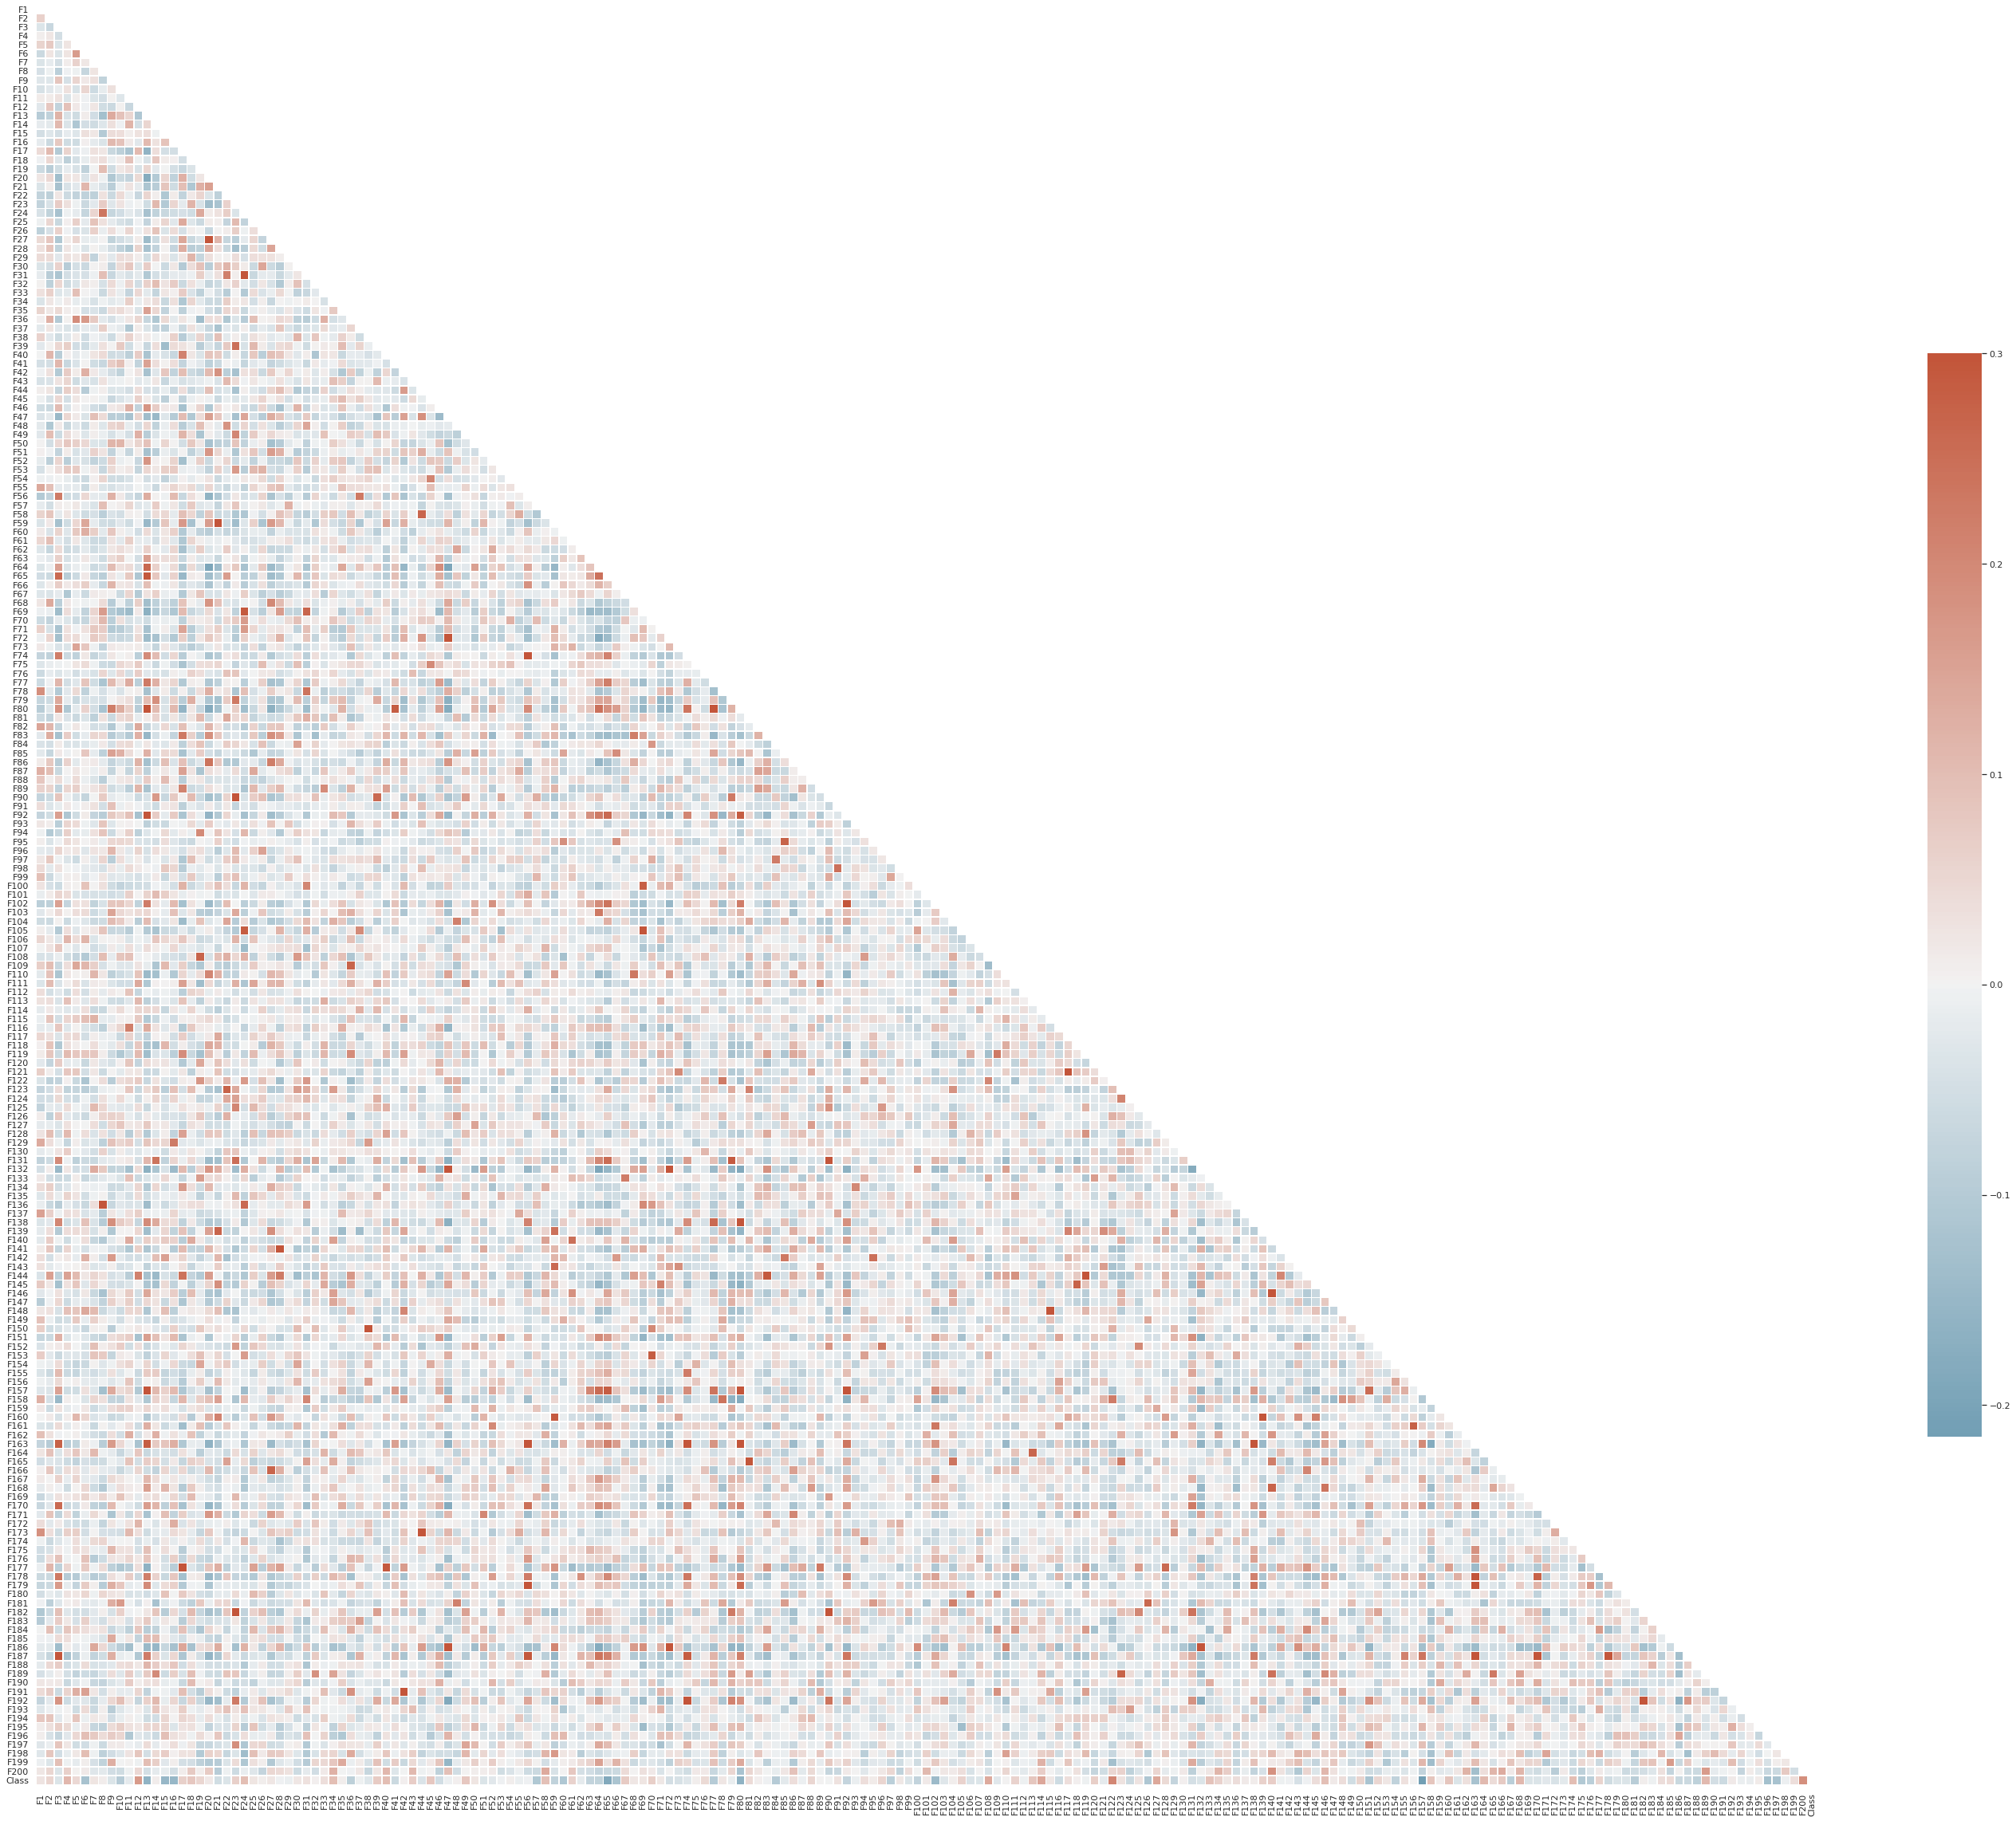

In [ ]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr_mat = df.corr(method='pearson')
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool)).abs()
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat['Class'].tail(5))
print(sorted_mat['F12'].tail(5))
print(sorted_mat['F65'].tail(5))
print(sorted_mat['F200'].tail(5))
print(sorted_mat['F122'].tail(5))
print(sorted_mat['F157'].tail(5))

F12     0.164925
F65     0.185885
F200    0.188194
F122    0.203490
F157    0.214910
dtype: float64
F9     0.063597
F11    0.068448
F3     0.080012
F2     0.080146
F4     0.092430
dtype: float64
F17    0.148413
F22    0.160667
F64    0.245529
F3     0.259337
F13    0.292204
dtype: float64
F163    0.131556
F166    0.133064
F58     0.136874
F189    0.164931
F140    0.182178
dtype: float64
F24     0.167939
F31     0.171089
F19     0.173309
F108    0.204749
F78     0.224108
dtype: float64
F64    0.256980
F65    0.281419
F80    0.348327
F92    0.350724
F13    0.396441
dtype: float64


>5 Variabel independent yang memiliki hubungan paling besar dengan variabel dependent (**Class**) adalah 

>>**F157**, **F122**, **F200**, **F65**, dan **F12**

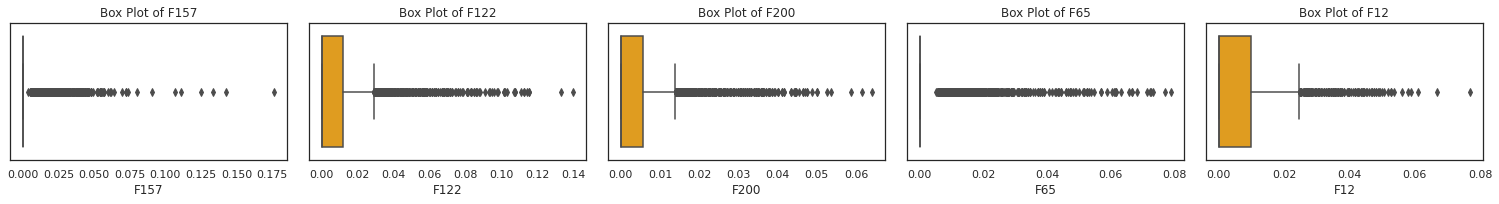

In [ ]:
df2 = df[['F157', 'F122', 'F200', 'F65', 'F12']]
plt.figure(figsize=(25, 3))

for i, col in zip(range(1,6), df2.columns):
    plt.subplot(1, 6, i)
    sns.boxplot(x=col, data=df, color='orange')
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()
plt.show()

>Terdapat outlier pada kelima variabel tersebut, tapi tidak akan diremove. 

>Namun, saya tidak akan membuang outlier.

### sebaran data (top 5 korelasi tertinggi terhadap Class)

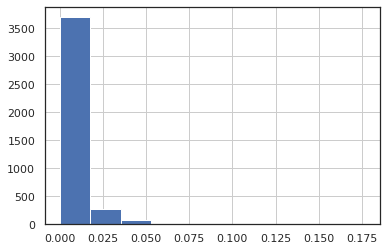

In [ ]:
df['F157'].hist()

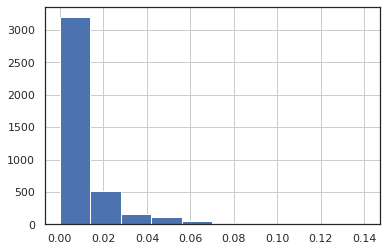

In [ ]:
df['F122'].hist()

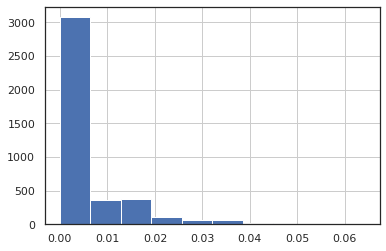

In [ ]:
df['F200'].hist()

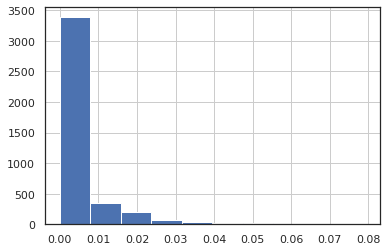

In [ ]:
df['F65'].hist()

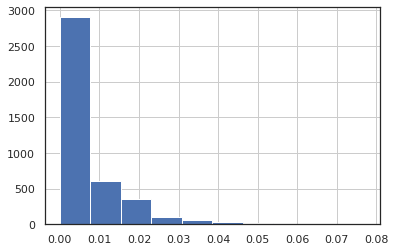

In [ ]:
df['F12'].hist()

>sebaran data pada kelima variabel tersebut cenderung bersebar di bawah 0.01

## data preprocessing

preprocessing yang akan dilakukan:

1. ***feature selection*** - untuk mempercepat komputasi dan membuang feature yang tidak terlalu berhubungan dengan Class
2. ***normalisasi*** - range/skala data dari feature berbeda-beda, sehingga perlu disamakan agar proses klasifikasi berjalan lebih baik

In [ ]:
#Feature Selection
#Top Features yang tidak saling memiliki korelasi tinggi (F157, F122, F200, dan F12)
X = df[['F157', 'F122', 'F200', 'F12']]
y = df[['Class']]
print(X.head())
print(X.shape)
print(np.array(X).dtype)
print(y.head())
print(y.shape)
print(np.array(y).dtype)

       F157      F122  F200       F12
0  0.020134  0.000000   0.0  0.000000
1  0.000000  0.014493   0.0  0.007246
2  0.005848  0.000000   0.0  0.005848
3  0.052083  0.000000   0.0  0.000000
4  0.051724  0.000000   0.0  0.000000
(4080, 4)
float64
   Class
0      1
1      1
2      1
3      1
4      1
(4080, 1)
int64


>Feature Selection: saya menggunakan 5 feature dengan korelasi tertinggi terhadap Class, F65 memiliki korelasi yang tinggi dengan F157 maka tidak dipilih.

In [ ]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_X = pd.DataFrame(norm.fit_transform(X), columns=X.columns, index=X.index)
norm_X.head()

,F157,F122,F200,F12
0,0.114094,0.00000,0.0,0.000000
1,0.000000,0.10352,0.0,0.094203
2,0.033138,0.00000,0.0,0.076023
3,0.295139,0.00000,0.0,0.000000
4,0.293103,0.00000,0.0,0.000000


>Normalisasi: saya menyamakan scale dari feature yang akan digunakan

## build model

Classifier Model/Method yang akan digunakan:

1. Naive Bayes

2. kNN

In [ ]:
class NaiveBayes:
  def __init__(self):
    pass

  def fit(self, X, y):
    self.params = {}
    self.class_prior = {}

    for col in X.columns:
      self.params[col] = {}

    data = pd.concat([X, y], axis=1)
    data = data.sort_values(by=['Class'])
    self.classes = y['Class'].unique()

    split_data = {}
    for cls in self.classes:
      split_data[cls] = data[data['Class'] == cls].loc[:, data.columns != 'Class']

    for i in split_data:
      for j in split_data[i]:
        self.params[j][i] = self.get_mean_stdev(split_data[i][j])

    for cls in self.classes:
      self.class_prior[cls] = len(split_data[cls]) / len(data)

  def get_mean_stdev(self, data):
    mean = data.mean()
    stdev = data.std()
    return {
        'mean': mean,
        'stdev': stdev
    }

  def predict(self, X):
    pred = []

    for i in range(len(X)):
      all_class_posterior = np.array([])
      for cls in self.classes:
        posterior = 1
        for col in X.columns:
          value = X.iloc[i][col]
          mean = self.params[col][cls]['mean']
          stdev = self.params[col][cls]['stdev']
          fx = (1 / (np.sqrt(2 * np.pi) * stdev)) * np.exp(-1 * ((value - mean) ** 2 / (2 * stdev**2)))
          posterior *= fx
        all_class_posterior = np.append(all_class_posterior, posterior)
      pred.append(self.classes[np.argmax(all_class_posterior)])
    return pred

>Saya menggunakan Naive Bayes karena merupakan supervised learning classifier model yang cukup simple dan powerful, serta cocok untuk multiclass classification

In [ ]:
from scipy.stats import mode

class kNN:
  def __init__(self, k, X, y):
    self.k = k
    self.X_train = X
    self.y_train = y

  def euclidean(self, p, q):
    return np.sqrt(np.sum((q - p)**2))

  def predict(self, X_test):
    pred = []

    for x in X_test:
      dist = []

      for train in self.X_train:
        dist.append(self.euclidean(x, train))

      dist = np.array(dist)
      top_k = np.argsort(dist)[:self.k]

      labels = [self.y_train[i] for i in top_k]
      pred.append(mode(labels).mode[0])

    return pred

>Saya menggunakan KNN karena merupakan unsupervised learning classifier model yang cukup simple dan cocok untuk multiclass classification

## data splitting

In [ ]:
X_knn = np.array(norm_X)
y_knn = np.array(y)

from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.25, stratify=y, random_state=42)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## prediction & evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### naive bayes

In [ ]:
clf_nb = NaiveBayes()
clf_nb.fit(X_train_nb, y_train_nb)
y_pred_nb = clf_nb.predict(X_test_nb)

In [ ]:
acc = accuracy_score(y_test_nb, y_pred_nb)
print(f'Accuracy score with Naive Bayes: {acc*100}%\n')
print(f'Classification Report (Precision & Recall):\n{classification_report(y_test_nb, y_pred_nb)}')

Accuracy score with Naive Bayes: 36.76470588235294%

Classification Report (Precision & Recall):
              precision    recall  f1-score   support

           1       0.33      0.82      0.47       204
           2       0.24      0.19      0.21       204
           3       0.31      0.20      0.24       204
           4       0.65      0.47      0.54       204
           5       0.42      0.17      0.24       204

    accuracy                           0.37      1020
   macro avg       0.39      0.37      0.34      1020
weighted avg       0.39      0.37      0.34      1020



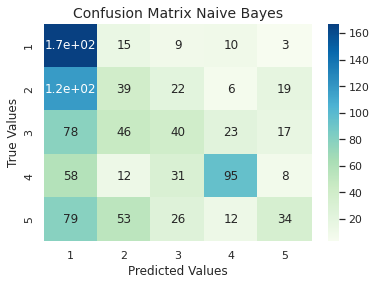

In [ ]:
sns.heatmap(confusion_matrix(y_test_nb, y_pred_nb), xticklabels=(['1','2','3','4','5']), yticklabels=(['1','2','3','4','5']), annot=True, cmap='GnBu')
plt.title('Confusion Matrix Naive Bayes', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

### knn

In [ ]:
#tune in for optimal k
from sklearn.metrics import mean_squared_error
error = []
for k in range(1, 30):
  clf = kNN(k, X_train_knn, y_train_knn)
  y_pred_knn = clf.predict(X_test_knn)
  error.append(np.sqrt(mean_squared_error(y_test_knn, y_pred_knn)))

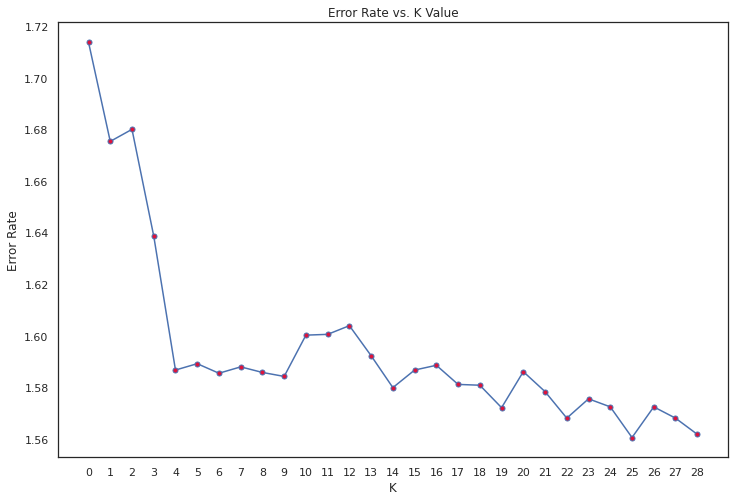

In [ ]:
#Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(error, marker='.', markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xticks(np.arange(0, len(error), 1.0))
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
optimum_k = 25
clf_knn = kNN(optimum_k, X_train_knn, y_train_knn)
y_pred_knn = clf_knn.predict(X_test_knn)

In [ ]:
acc = accuracy_score(y_test_knn, np.array(y_pred_knn))
print(f'Accuracy score with {optimum_k}-NN: {acc*100}%\n')
print(f'Classification Report (Precision & Recall):\n{classification_report(y_test_knn, y_pred_knn)}')

Accuracy score with 25-NN: 49.411764705882355%

Classification Report (Precision & Recall):
              precision    recall  f1-score   support

           1       0.60      0.67      0.63       204
           2       0.39      0.66      0.49       204
           3       0.48      0.25      0.32       204
           4       0.57      0.66      0.61       204
           5       0.45      0.24      0.31       204

    accuracy                           0.49      1020
   macro avg       0.50      0.49      0.47      1020
weighted avg       0.50      0.49      0.47      1020



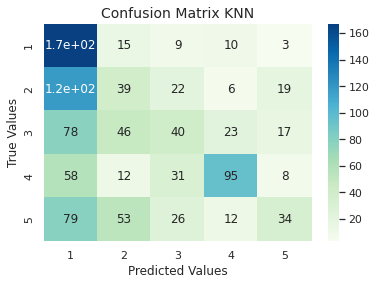

In [ ]:
sns.heatmap(confusion_matrix(y_test_knn, y_pred_nb), xticklabels=(['1','2','3','4','5']), yticklabels=(['1','2','3','4','5']), annot=True, cmap='GnBu')
plt.title('Confusion Matrix KNN', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

Berdasarkan hasil yang didapatkan, akurasi kedua model yang saya buat belum maksimal. KNN dengan k=25 memiliki akurasi yang lebih baik daripada Naive Bayes.